# Logistic Regression

Define the logistic function as:

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

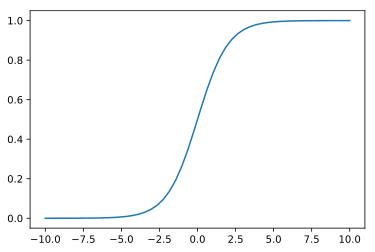

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def logistic(x):  
    return 1./(1.+np.exp(-x))

x = np.linspace(-10, 10)
plt.plot(x, logistic(x))
plt.show()

Instead of a linear classifier, we attempt to fit $\sigma(\mathbf{x}\cdot\mathbf{\theta})$

To do this, we can use gradient descent as before, we optimise the following loss function. We can't use MSE (mean-squared error) for logistic regression.

$$c(\sigma(\theta\cdot x), y) = -\frac{1}{N} \sum_{i=0}^{i=N} y\log(\sigma(\theta \cdot x)) + (1 - y)\log(1 - \sigma(\theta \cdot x))$$

$$ = -\frac{1}{N}\left[y\cdot \log(\sigma(\theta \cdot x)) + (1 - y)\log(1 - \sigma(\theta \cdot x))\right]$$

$$\nabla c(\sigma(\theta\cdot x), y) = -\frac{1}{N} \left[xy\frac{1}{\sigma(\theta\cdot x)}\sigma'(\theta\cdot x) - x(1 - y)\frac{1}{1 - \sigma(\theta\cdot x)}\sigma'(\theta\cdot x)\right]$$

$$ = -\frac{1}{N} \left[xy(1-\sigma(\theta\cdot x)) - x(1 - y)\sigma(\theta\cdot x)\right]$$

$$ = -\frac{1}{N}\left[xy - xy\sigma(\theta \cdot x) - x\sigma(\theta \cdot x) + xy\sigma(\theta \cdot x) \right]$$

$$= -\frac{1}{N} \left[ xy - x\sigma(\theta \cdot x) \right] $$

$$ = \frac{1}{N} x (\sigma(\theta \cdot x) - y) $$

In [2]:
def cost(x, y, theta):
    h = logistic(x * theta)
    
    return np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))

In [3]:
def cost_grad(x, y, theta):
    h = logistic(x * theta).T - y
    
    return h.dot(x)[0,0]

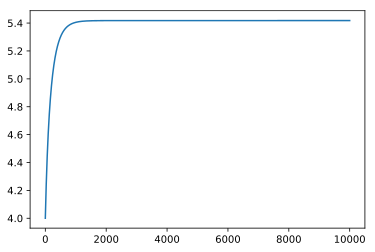

In [4]:
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]

theta = 4
step = 1E-2
epochs = 10000

thetas = [theta]

for _ in range(epochs):    
    dtheta = cost_grad(X, y, theta)
    
    # go down the hill
    theta -= step * dtheta
    thetas.append(theta)
    
plt.plot(thetas)
plt.show()

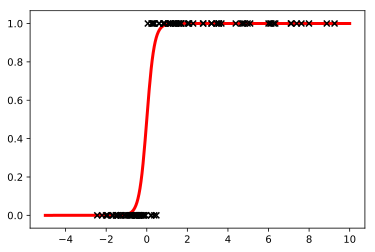

In [5]:
X_test = np.linspace(-5, 10, 300)
loss = logistic(X_test * theta)

plt.plot(X_test, loss, color='red', linewidth=3)
plt.scatter(X.ravel(), y, color='black', zorder=20, marker='x')

plt.show()